In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

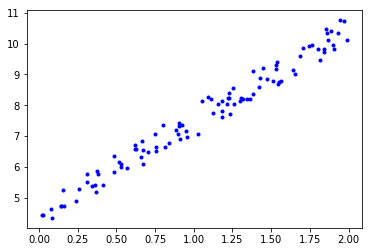

In [3]:
plt.plot(X,y,'b.')

In [4]:
X_b = np.c_[np.ones((100,1)),X]
best_theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [5]:
best_theta

array([[4.44394514],
       [3.00942536]])

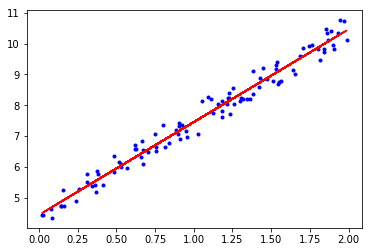

In [6]:
plt.plot(X,y,'b.')
plt.plot(X,X_b @ best_theta,'r-')

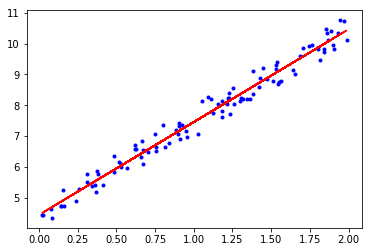

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
plt.plot(X,y,'b.')
plt.plot(X,lin_reg.predict(X),'r-')

In [8]:
lin_reg.intercept_,lin_reg.coef_

(array([4.44394514]), array([[3.00942536]]))

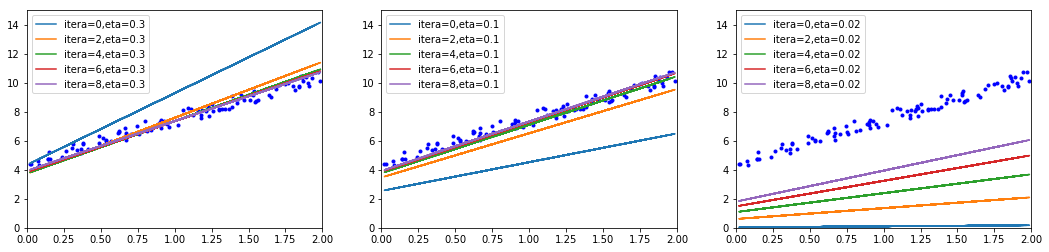

In [9]:
thetas_on_eta = {}
fig = plt.figure(figsize=(18,4))
for i,eta in enumerate([0.3,0.1,0.02]):
    ax = fig.add_subplot(1,3,i+1)
#     eta = 0.1
    n_iterations = 1000
    m = X_b.shape[0]
    theta = np.random.randn(2,1)
    thetas = theta
    ax.plot(X,y,'b.')
    plt.axis([0,2,0,15])
    for itera in range(n_iterations):
        thetas = np.c_[thetas,theta]
        gradients = 2/m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients

        if itera in range(0,10,2):
            ax.plot(X,X_b @ theta,'-',label='itera=%s,eta=%s' % (itera,eta))
    thetas_on_eta[eta] = thetas
    plt.legend()

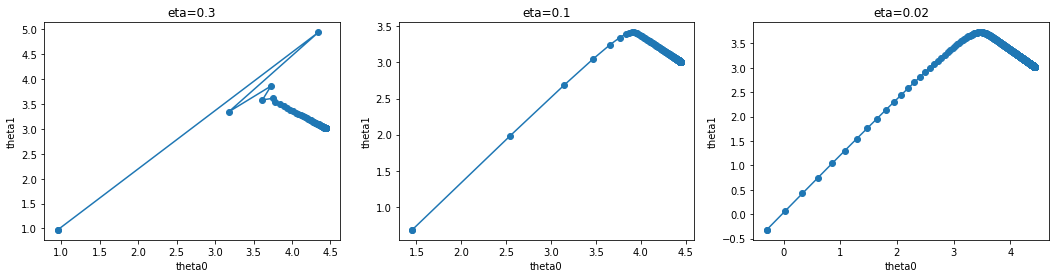

In [10]:
fig = plt.figure(figsize=(18,4))
i = 1
for eta,thetas_xy in thetas_on_eta.items(): # 不同学习率下批量梯度下降
    fig.add_subplot(1,3,i)
    plt.plot(thetas_xy[0],thetas_xy[1],'-o')
    plt.xlabel('theta0')
    plt.ylabel('theta1')
    plt.title('eta=%s' % eta)
    i += 1

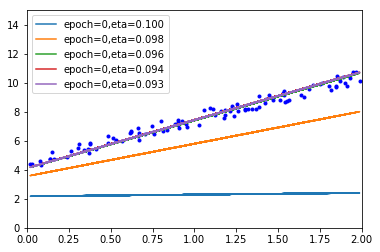

In [11]:
n_epochs = 50
t0 = 5; t1 = 50
m = X_b.shape[0]
def learning_schedule(t):
    return t0/(t+t1)
eta = 0.2
theta = np.random.randn(2,1)
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])

thetas = theta

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        X_i = X_b[random_index:random_index+1]
        y_i = y[random_index:random_index+1]
        gradients = 2 * X_i.T @ (X_i @ theta - y_i)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        if epoch * m + i in range(5) :
            plt.plot(X,X_b @ theta,'-',label='epoch=%s,eta=%.3f' % (epoch,eta))
        thetas = np.c_[thetas,theta]
    plt.legend()

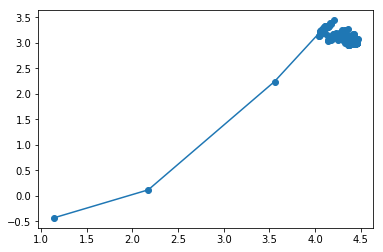

In [12]:
plt.plot(thetas[0],thetas[1],'-o') # 随机梯度下降

In [13]:
m = X_b.shape[0]
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

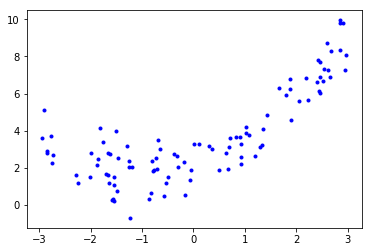

In [14]:
plt.plot(X,y,'b.')

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)

In [16]:
X_poly = poly_features.fit_transform(X)

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lin_reg.intercept_,lin_reg.coef_

(array([2.14310887]), array([[0.91140407, 0.45922041]]))

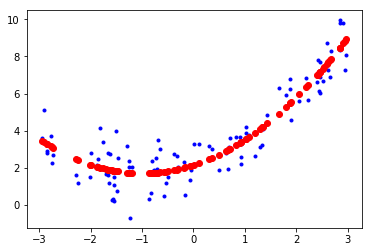

In [19]:
plt.plot(X,y,'b.')
plt.plot(X,lin_reg.predict(X_poly),'ro')

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [21]:
def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_error = []; test_error = []
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_error.append(mean_squared_error(y_train[:m],y_train_predict))
        test_error.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_error),'r-+',linewidth=2,label='train')
    plt.plot(np.sqrt(test_error),'b-',linewidth=2,label='test')

In [22]:
from sklearn.pipeline import Pipeline

In [23]:
def return_model(degree):
    polynomial_regression = Pipeline([
        ('poly_features',PolynomialFeatures(degree=degree,include_bias=False)),
        ('sgd_reg',LinearRegression()),
    ])
    return polynomial_regression

[0, 80, 0, 3]

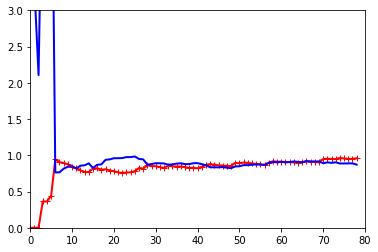

In [24]:
plot_learning_curves(return_model(2),X,y)
plt.axis([0,80,0,3])

[0, 80, 0, 5]

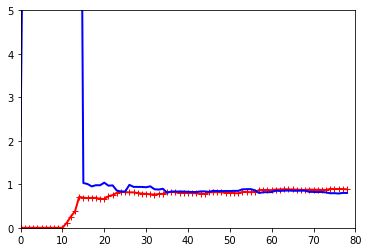

In [25]:
plot_learning_curves(return_model(10),X,y)
plt.axis([0,80,0,5])

In [26]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.14464967]])

In [27]:
from sklearn.base import clone
from sklearn.linear_model import SGDRegressor

In [28]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
X_poly_scaled = scale(X_poly)
X_train_poly_scaled,X_test_poly_scaled,y_train,y_test = train_test_split(X_poly_scaled,y,test_size=0.3)

In [29]:
sgd = SGDRegressor(warm_start=True,penalty=None,learning_rate='constant',eta0=0.0005)

In [30]:
minimum_val_error = float('inf')
best_epoch = None
best_model = None
val_errors = []
for epoch in range(1000):
    sgd.partial_fit(X_train_poly_scaled,y_train[:,0])
    y_val_predict = sgd.predict(X_test_poly_scaled)
    val_error = mean_squared_error(y_test,y_val_predict)
    val_errors.append(val_error)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd)

In [31]:
best_epoch

103

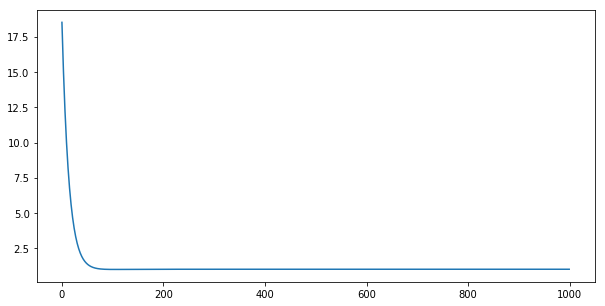

In [32]:
plt.figure(figsize=(10,5))
plt.plot(val_errors)

In [33]:
from sklearn.datasets import load_iris

In [34]:
iris = load_iris()

In [35]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [36]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [37]:
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int)

In [38]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

In [40]:
log_reg.classes_

array([0, 1])

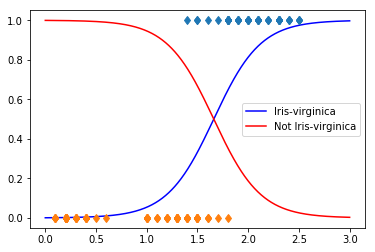

In [41]:
plt.plot(X_new,y_proba[:,1],'b-',label='Iris-virginica')
plt.plot(X_new,y_proba[:,0],'r-',label='Not Iris-virginica')
plt.plot(X[y.astype(np.bool)],np.ones((len(X[y.astype(np.bool)]))),'d')
plt.plot(X[(y-1).astype(np.bool)],np.zeros((len(X[(y-1).astype(np.bool)]))),'d')
plt.legend()

In [42]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
softmax_reg = LogisticRegression(multi_class='multinomial',C=10)

In [45]:
softmax_reg.fit(iris['data'][:,(2,3)],iris['target'])

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
softmax_reg.predict([[5,2]])

array([2])

In [47]:
from matplotlib.colors import ListedColormap,Colormap,LinearSegmentedColormap
import myfunc
cdict = {'green':   [(0.0,  0.0, 0.8),
                       (0.5,  1.0, 1.0),
                       (1.0,  0.0, 1.0)],

             'red': [(0.0,  0.0, 0.0),
                       (0.25, 0.0, 0.0),
                       (0.75, 1.0, 1.0),
                       (1.0,  0.5, 1.0)],

             'blue':  [(0.0,  0.0, 0.0),
                       (0.5,  0.0, 0.0),
                       (1.0,  0.0, 0.0)]}

In [48]:
sixmap = ListedColormap(myfunc.SIX_COLORS)
sixmap_2 = Colormap(myfunc.SIX_COLORS)
sixmap_3 = LinearSegmentedColormap('a',cdict)

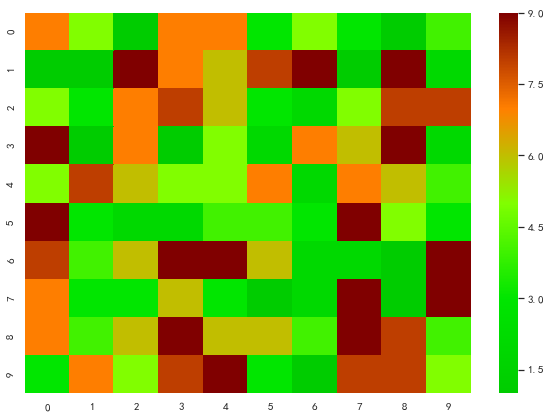

In [49]:
import seaborn as sns
sns.heatmap(np.random.randint(1,10,(10,10)),cmap=sixmap_3)

In [50]:
from matplotlib import colors

In [51]:
sample_nums = 

SyntaxError: invalid syntax (<ipython-input-51-9a9a50ab1492>, line 1)

Now let's implement the Softmax function. Recall that it is defined by the following equation:

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

So the equations we will need are the cost function:

$J(\mathbf{\Theta}) = dfrac{1}{m}\sum\limits{i=1}^{m}\sum\limits{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$
And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting nan values.